# ML私房手册-概率与统计

## 概率

### 贝叶斯公式

#### 参考文章

- [贝叶斯公式的直观理解](https://www.cnblogs.com/yemanxiaozu/p/7680761.html)
- [极大似然估计原理解析](https://blog.csdn.net/jgj123321/article/details/91571640)

### 概率分布

#### 几何分布的期望到底代表什么？

几何分布看起来最简单，但是仔细思考却最感觉各种违和，其中之一就是几何分布的期望，$E(x)=\frac{1}{p}$，比如每一次的成功率为0.2，可以得出期望值为5。几何分布的随机变量$x$指第一次成功时的次数。应该这样思考：

期望指实验无数次，随机变量$x$最终的平均值，即可能第1次成功，第3次成功，第10次成功。。。所有这些次数加起来除以实验次数$n$，正好等于5，即如果实验无数次的话，平均在第5次成功。

## 统计

### 回归算法评估

#### 深入理解R2决定系数

- [决定系数形象的说明](https://www.slideshare.net/pcdjohnson/extending-rsquared-beyond-ordinary-leastsquares-linear-regression-95949488?from_action=save)

先来看决定系数的基本公式是：

$R^2=1-\frac{SSE}{SST}$

其中：
- $SSE$为残差平方和，即所有点的实际值减去预测的值的平方和。
- $SST$为总的平方和，为所有点的实际值减去均值的平方和。
- 另外还有一个$SSR$，为所有点的预测值减去均值的平方和。

理解的关键是，$\frac{SSE}{SST}$是表示$y$的总波动中（其实就是y的方差）有多少不能被$x$解释，或者说不是由因变量$x$引起的，$1-\frac{SSE}{SST}$则表示有多少可以被$x$解释，或者说$y$的方差有多少是由因变量$x$引起的。思考方法如下：  
首先只考虑一串数字$y$，衡量$y$的离散程度的指标是方差，即：$Var(y)=\frac{\sum_i^n(y_i-\bar y)^2}{n}$。现在考虑，这些$y_i$，实际上都在一条回归线上，因此每一个$(y_i-\bar y)^2$，即每一个$y_i$的误差，其实都是$x$导致的，或者说可以被$x$解释的。现在如果这个$y_i$不在这条回归线上，那么，会有一部分的残差为$(y_i-y)^2$，这一部分的误差是不能被$x$解释的。所以，$R^2$其实就是方差中，可以被$x$解释的误差的占比，如果方差全部都能被$x$解释，说明回归线拟合得很好。

这里仍然会有一点小疑惑，上面的解释要成立，有一个前提是$SST=SSR+SSE$，其推导过程如下：

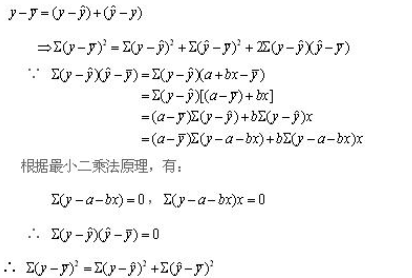

其中根据最小二乘法，代价函数$SSE=\Sigma(y-\hat{y})^2$，对$a$求偏导得出$\Sigma(y-a-bx)x$为0，对$b$求偏导可知$\Sigma(y-a-bx)$为0。

以下通过代码加深理解：

In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
reg = linear_model.LinearRegression()
ar = np.array([[[1], [2], [3]], [[2.01], [4.03], [6.04]]])
y = ar[1, :]
x = ar[0, :]
reg.fit(x, y)
print('Coefficients: \n', reg.coef_)
xTest = np.array([[4], [5], [6]])
ytest = np.array([[9], [8.5], [14]])

preds = reg.predict(xTest)
print("R2 score : %.2f" % r2_score(ytest, preds))
print("Mean squared error: %.2f" % mean_squared_error(ytest, preds))

er = []
g = 0
for i in range(len(ytest)):
    print("actual=", ytest[i], " observed=", preds[i])
    x = (ytest[i] - preds[i])**2
    er.append(x)
    g = g + x

x = 0
for i in range(len(er)):
    x = x + er[i]

print("MSE", x / len(er))

v = np.var(er)
print("variance", v)

print("average of errors ", np.mean(er))

m = np.mean(ytest)
print("average of observed values", m)

y = 0
for i in range(len(ytest)):
    y = y + ((ytest[i] - m)**2)

print("total sum of squares", y)
print("ẗotal sum of residuals ", g)
print("r2 calculated", 1 - (g / y))

Coefficients: 
 [[2.015]]
R2 score : 0.62
Mean squared error: 2.34
actual= [9.]  observed= [8.05666667]
actual= [8.5]  observed= [10.07166667]
actual= [14.]  observed= [12.08666667]
MSE [2.34028611]
variance 1.2881398892129619
average of errors  2.3402861111111117
average of observed values 10.5
total sum of squares [18.5]
ẗotal sum of residuals  [7.02085833]
r2 calculated [0.62049414]


In [3]:
import numpy as np
import math

x = np.array([1, 3, 8, 7, 10])
y = np.array([10, 12, 24, 21, 34])


# 计算相关度
def computeCorrelation(x, y):
    xBar = np.mean(x)
    yBar = np.mean(y)
    SSR = 0.0
    varX = 0.0
    varY = 0.0
    for i in range(0, len(x)):
        diffXXbar = x[i] - xBar
        difYYbar = y[i] - yBar
        SSR += (diffXXbar * difYYbar)
        varX += diffXXbar**2
        varY += difYYbar**2
    SST = math.sqrt(varX * varY)
    return SSR / SST


# 计算R平方
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    results['polynomial'] = coeffs.tolist()
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y) / len(y)
    ssreg = np.sum((yhat - ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['determination'] = ssreg / sstot
    return results


result = computeCorrelation(x, y)
r = result
r_2 = result**2
print("r:", r)
print("r^2:", r * r)
print(polyfit(x, y, 1)['determination'])

r: 0.9687093888041072
r^2: 0.9383978799572269
0.938397879957228


#### 卡方检验

- [卡方检验和相关性](https://adata.site.wesleyan.edu/schedule/chi-square-and-correlation/)

### 分类算法评估

分类模型验证主要有准确率，查准率，查全率，F1值，PR曲线，ROC/AUC等各种指标，知乎上这一篇文章已经总结得非常好了：  
[《一文让你彻底理解准确率，精准率，召回率，真正率，假正率，ROC/AUC》](https://zhuanlan.zhihu.com/p/46714763)

这里尽可能的给出一些实际的例子来更深刻的理解这几个指标。